In [2]:
import os
from os import path, environ
os.chdir('../')
os.getcwd()

import numpy as np
from common.preprocessing import *
import pandas as pd
from tqdm import tqdm  
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

In [3]:
ori_data = pd.read_csv('data/wtbdata_245days_clean.csv')
train_data = pd.read_csv('data/train_data.csv')
# data = outlier_handler(ori_data, ['Etmp','Itmp'])
# data = feature_engineering(data)
# calculate the correlation matrix


In [53]:
datelist = pd.date_range('2000-01-01 00:00:00', periods =144*9, freq='10T')

In [54]:
datelist

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 00:10:00', '2000-01-01 00:20:00',
               '2000-01-01 00:30:00', '2000-01-01 00:40:00', '2000-01-01 00:50:00',
               '2000-01-01 01:00:00', '2000-01-01 01:10:00', '2000-01-01 01:20:00',
               '2000-01-01 01:30:00',
               ...
               '2000-01-09 22:20:00', '2000-01-09 22:30:00', '2000-01-09 22:40:00',
               '2000-01-09 22:50:00', '2000-01-09 23:00:00', '2000-01-09 23:10:00',
               '2000-01-09 23:20:00', '2000-01-09 23:30:00', '2000-01-09 23:40:00',
               '2000-01-09 23:50:00'],
              dtype='datetime64[ns]', length=1296, freq='10T')

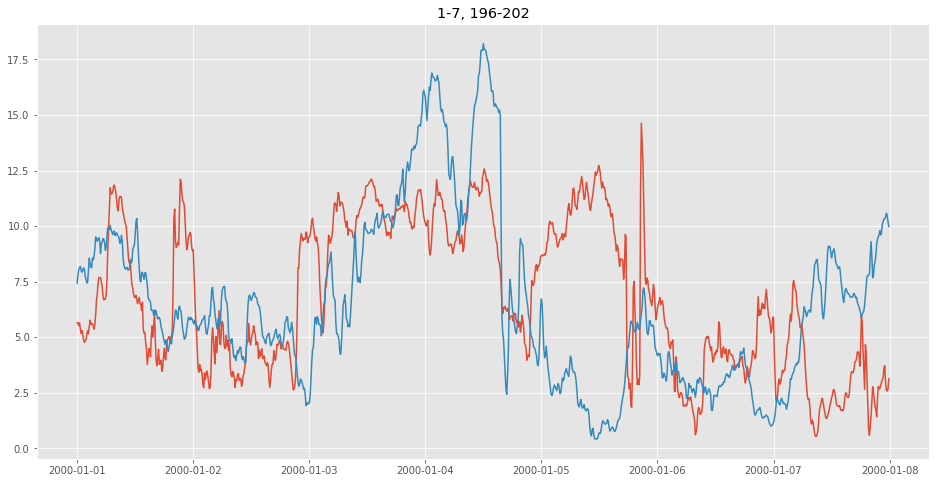

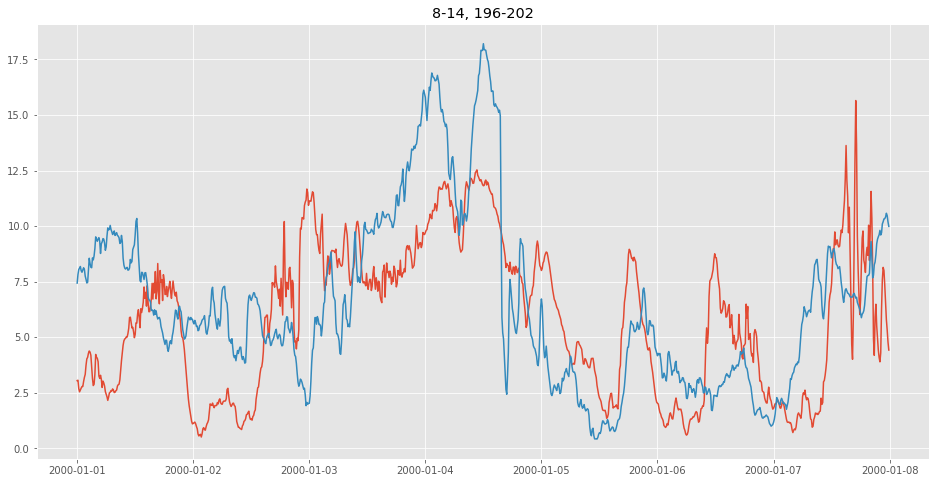

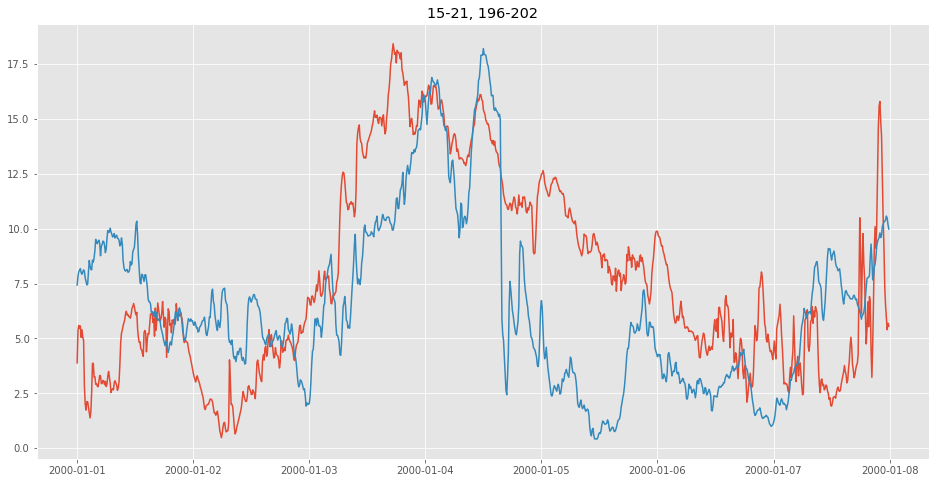

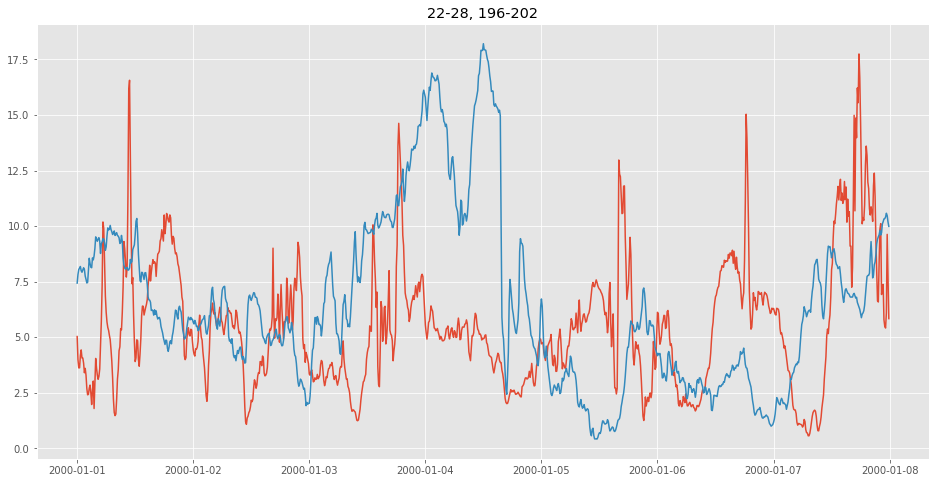

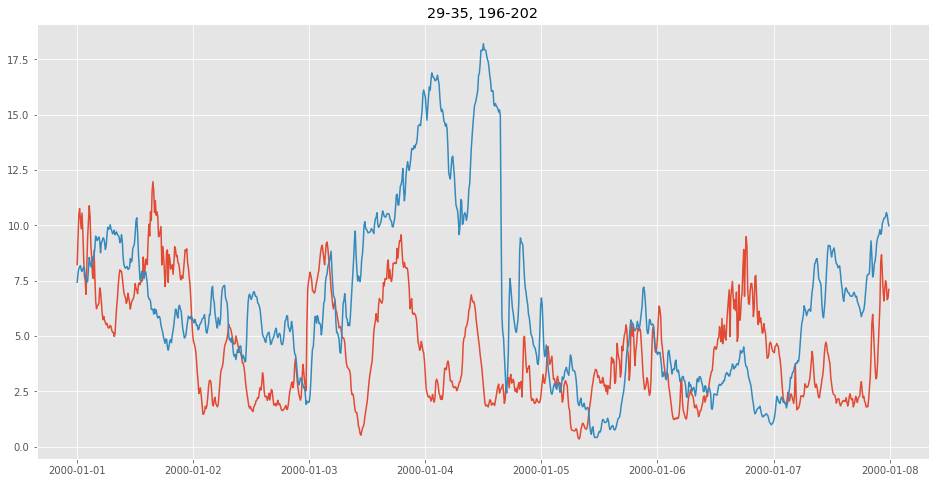

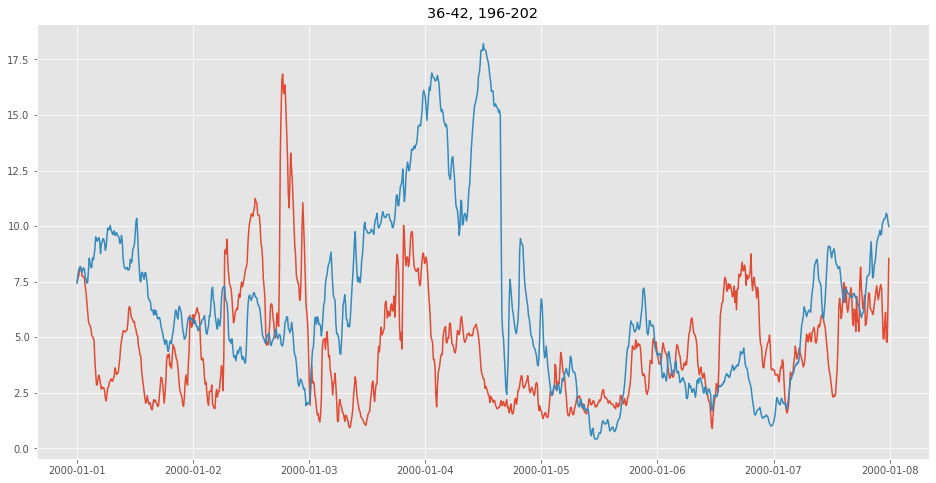

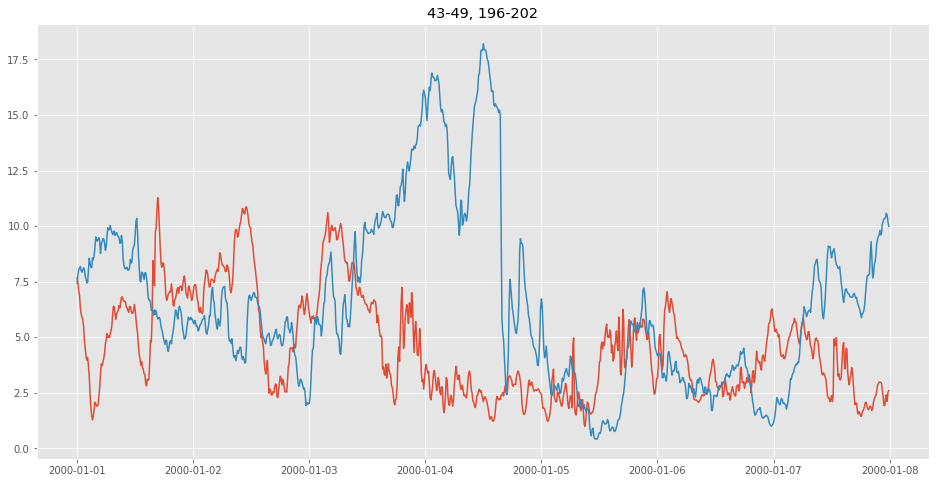

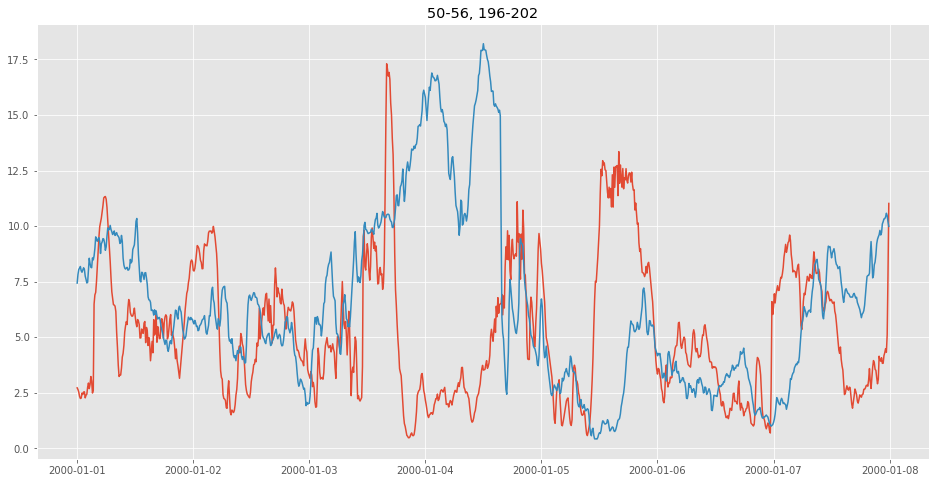

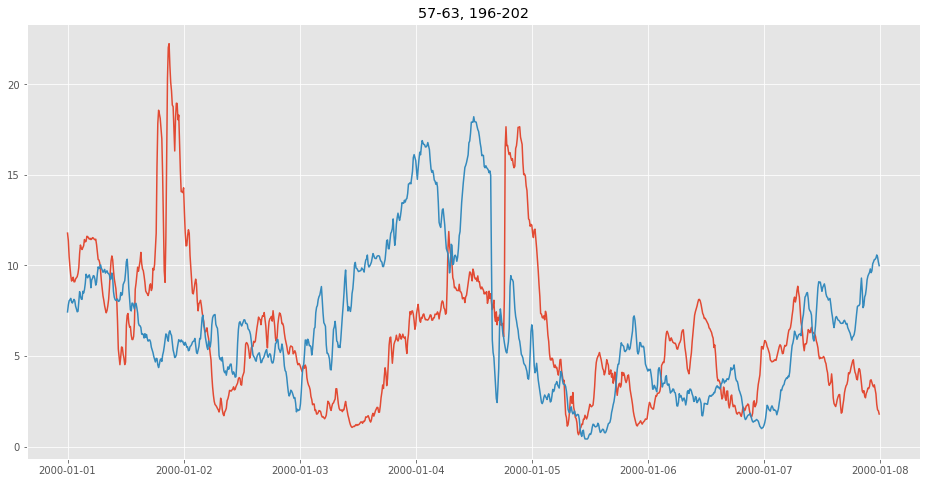

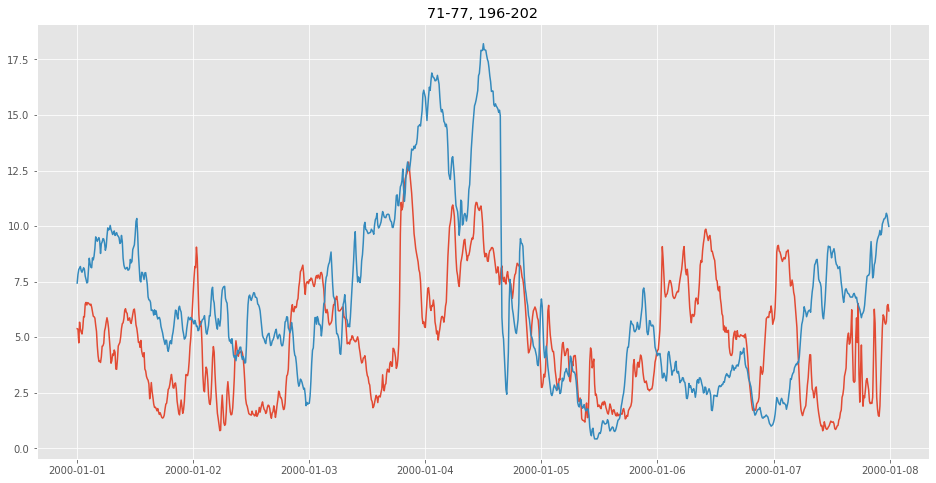

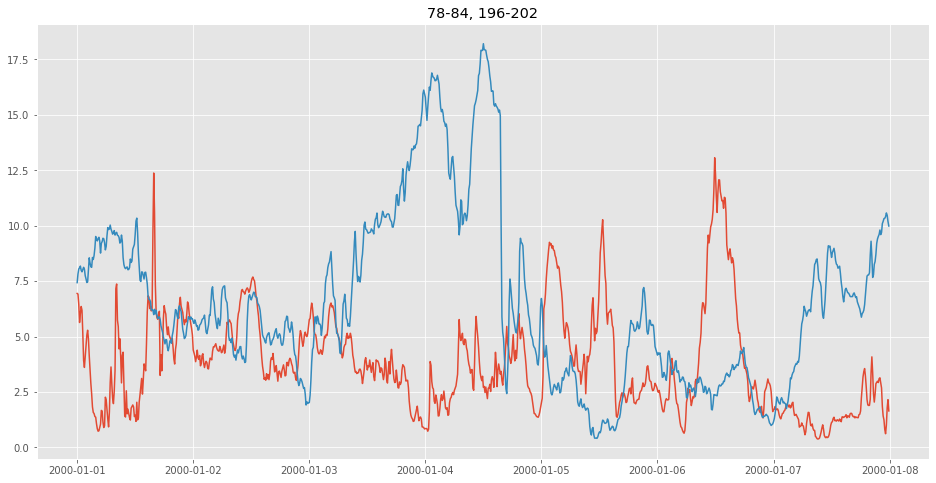

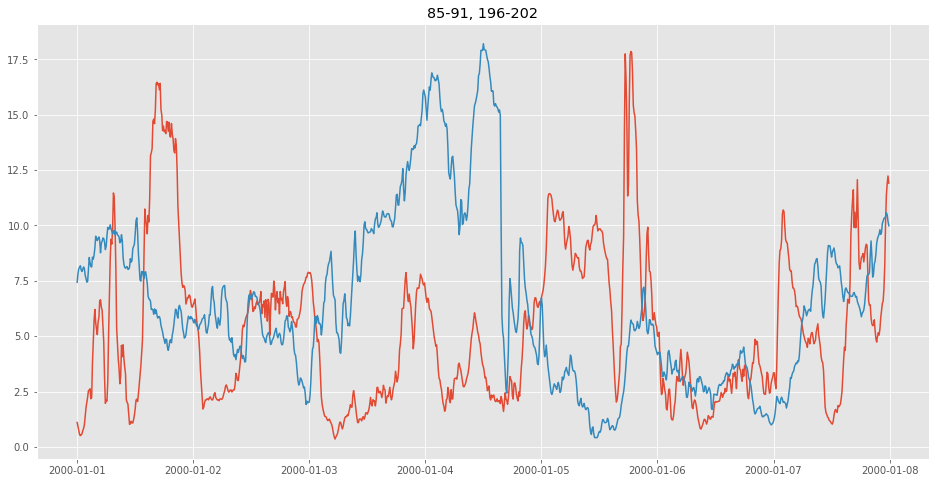

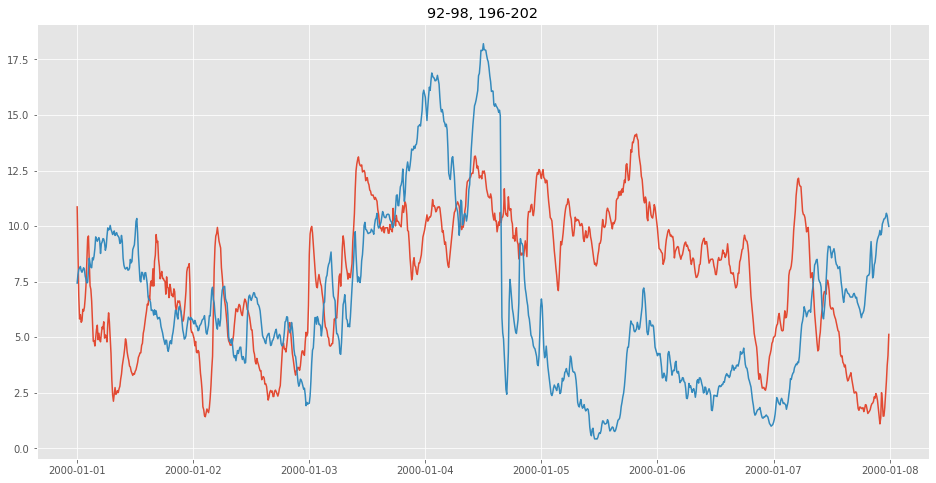

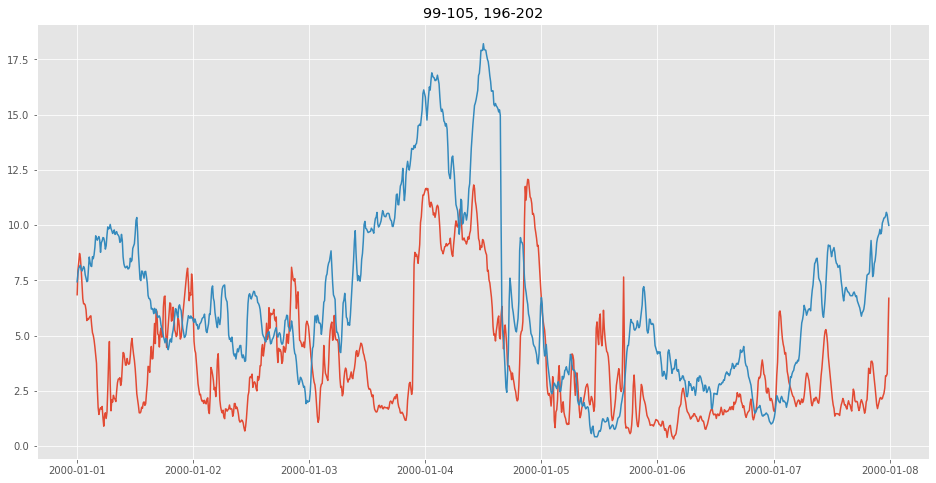

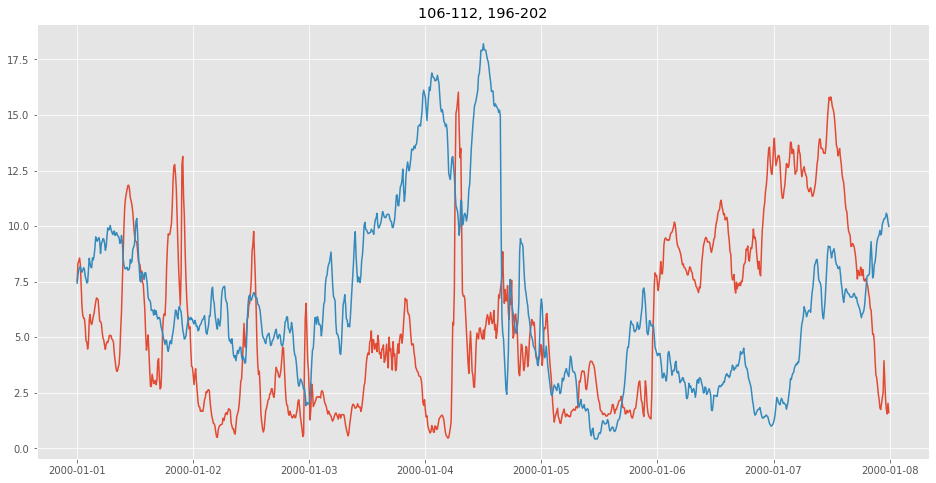

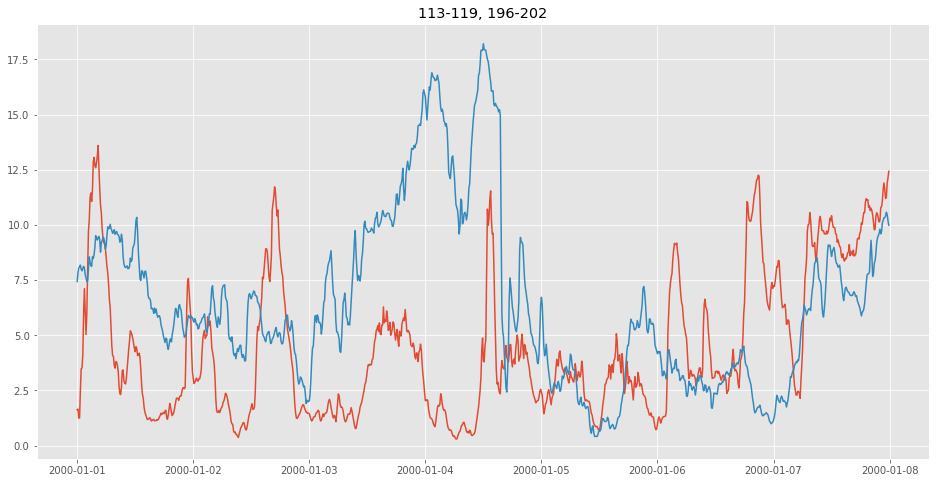

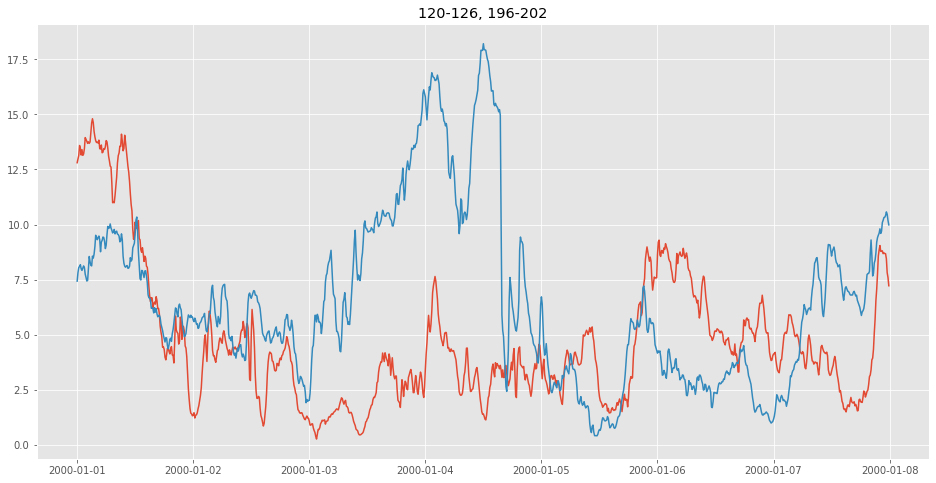

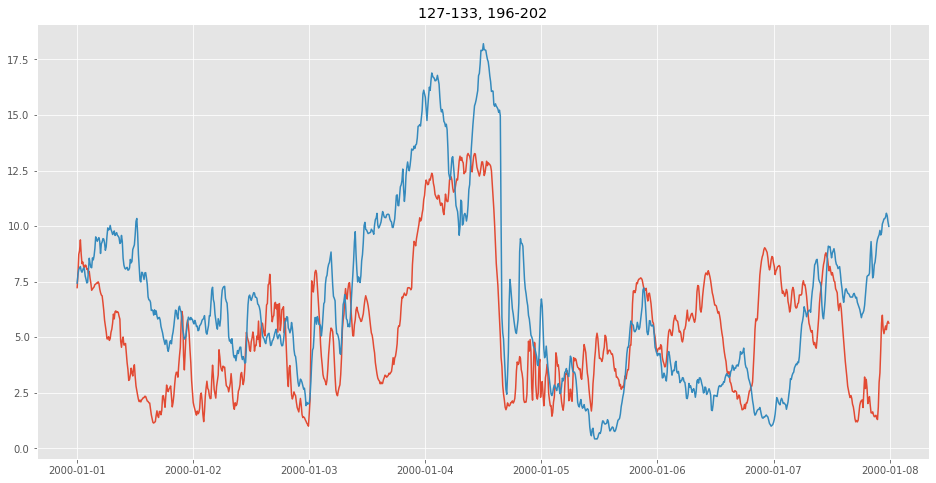

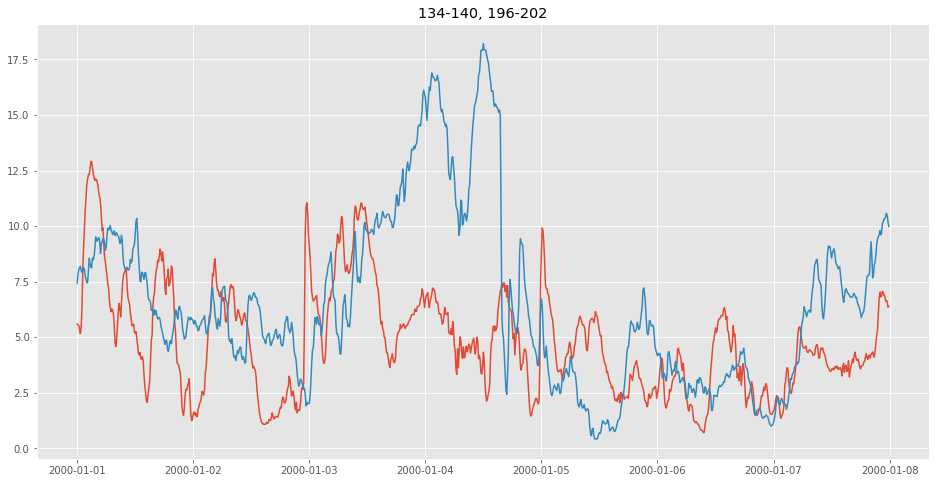

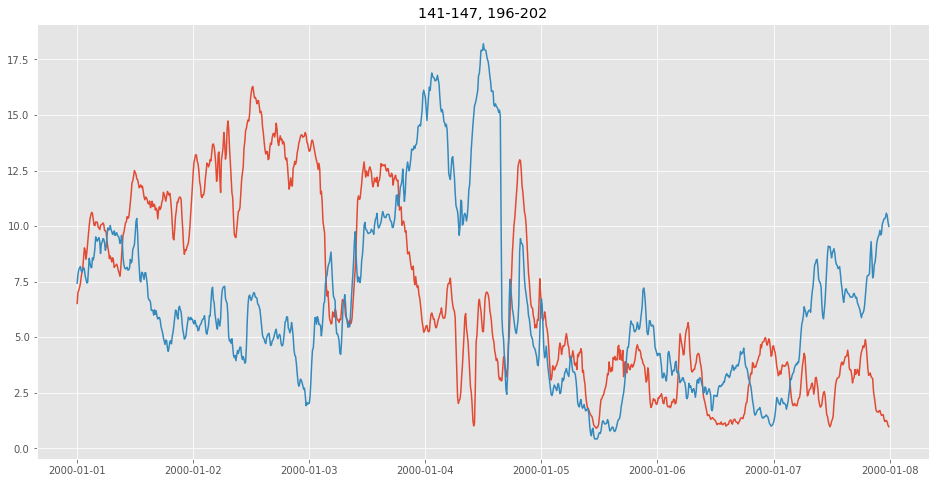

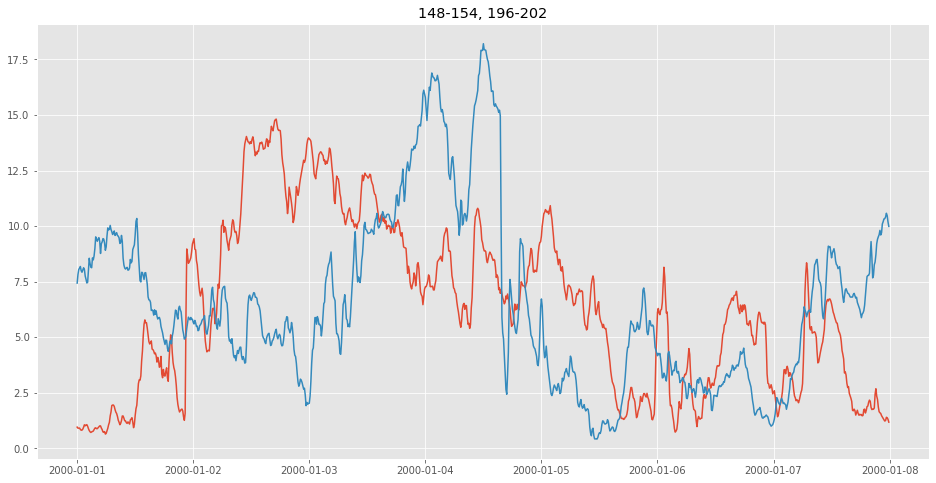

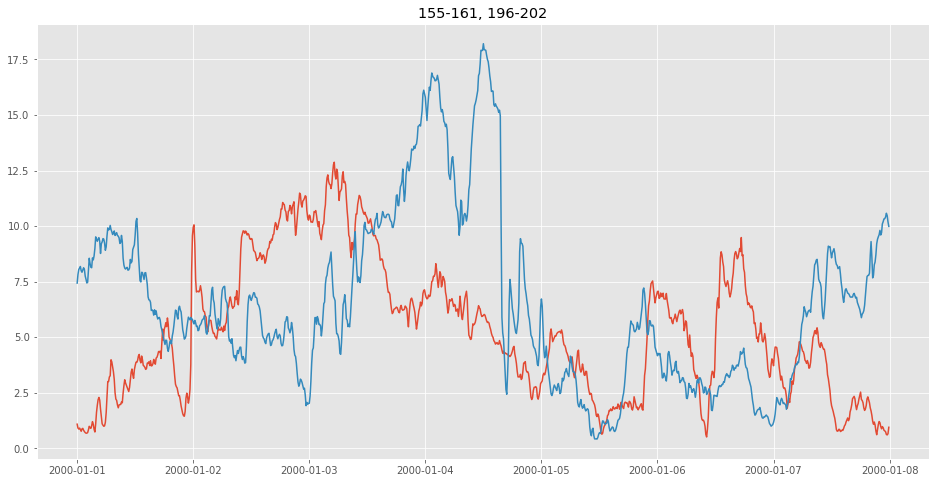

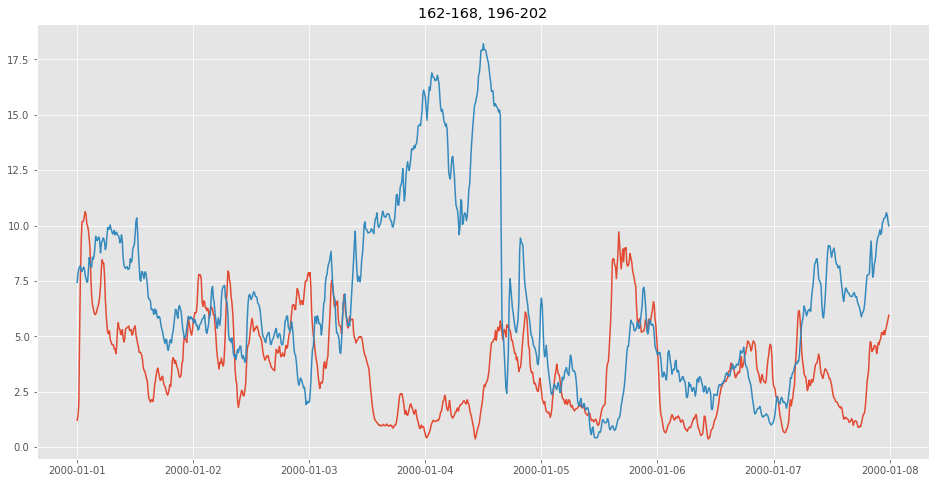

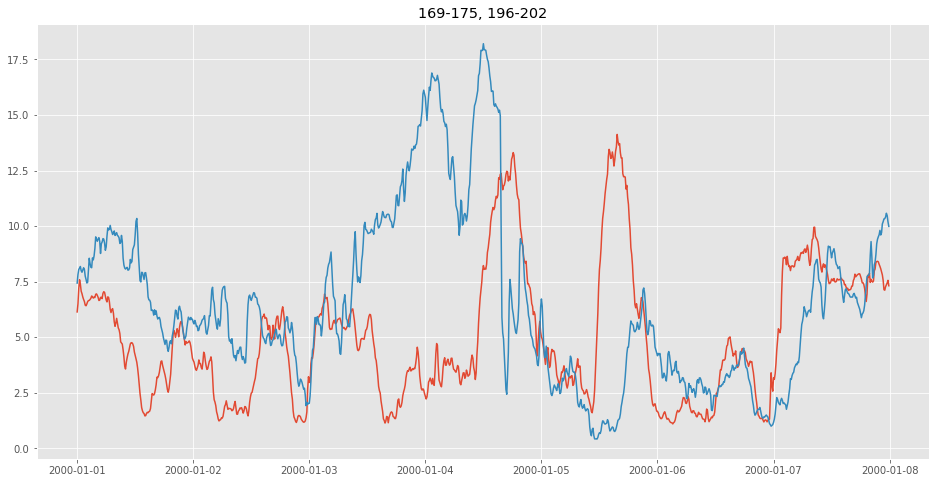

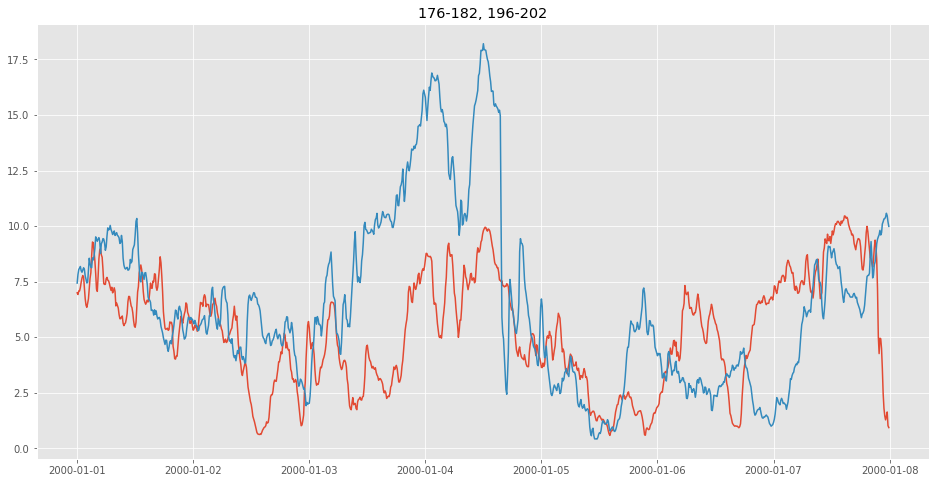

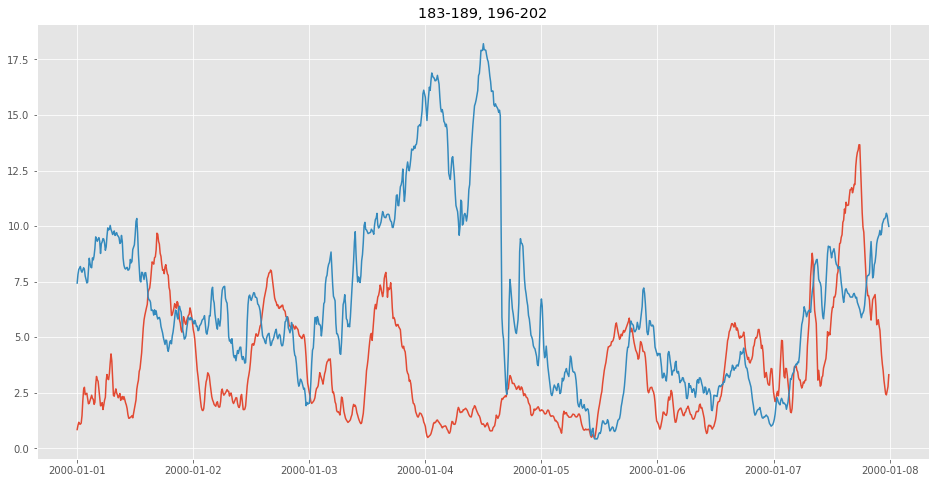

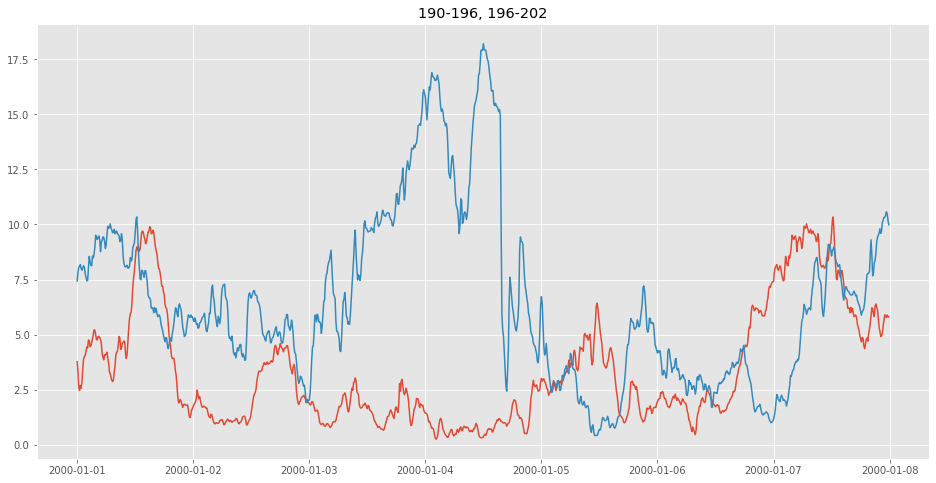

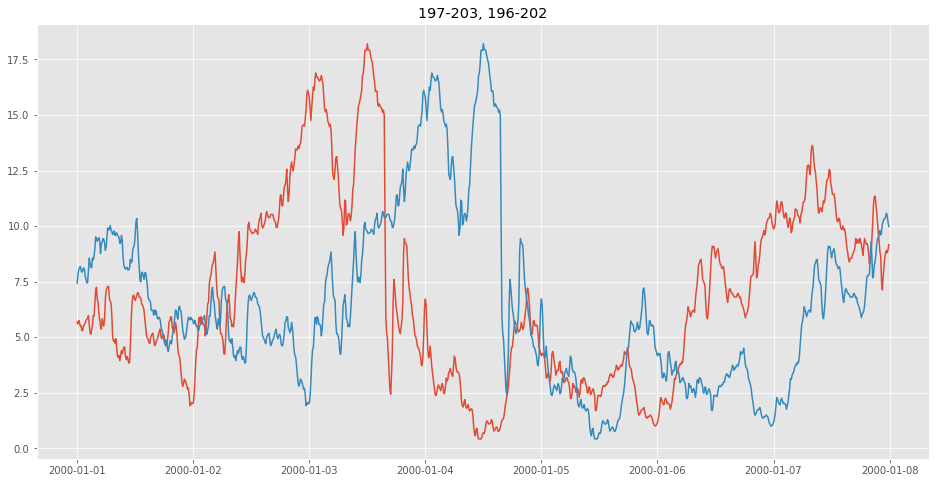

In [63]:
window_size = 7
end_date = 202
Y= ori_data[(ori_data['Day']<=end_date)&(ori_data['Day']>=end_date-window_size+1)]
Y_mean = Y.groupby(by=['Day','Tmstamp']).mean()
i = 1
while i < 200:
    
    X = ori_data[(ori_data['Day']<=i+window_size-1)&(ori_data['Day']>=i)]
    X_mean = X.groupby(by=['Day','Tmstamp']).mean()
    if len(range(144*window_size)) == len(X_mean['Wspd']):
        x = pd.date_range('2000-01-01 00:00:00', periods =144*window_size, freq='10T')
        plt.plot(x,X_mean['Wspd'])
        plt.plot(x,Y_mean['Wspd'])
        plt.title(f'{i}-{i+window_size-1}, {202-window_size+1}-202')
#         plt.xticks(pd.date_range('2000-01-01 00:00:00', periods =24*window_size, freq='1H'))
        plt.show()

    i+=window_size